# Topics in numerical programming Problem set 2 
B00751897 <br>
Yi Ming Chang<br>
March 1st, 2021

# Problem 1: Basis function expansion 

# Part 1 a) 

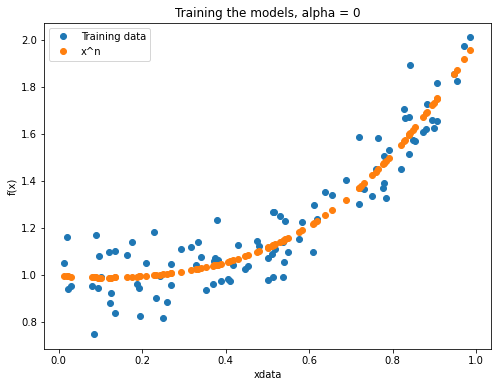

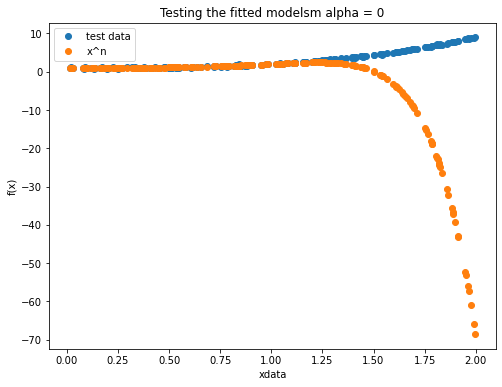

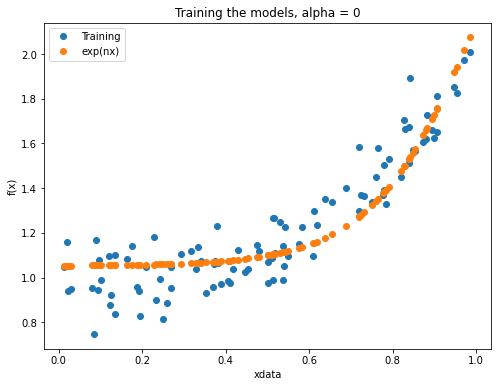

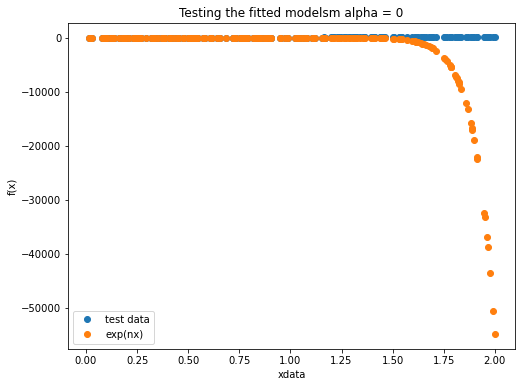

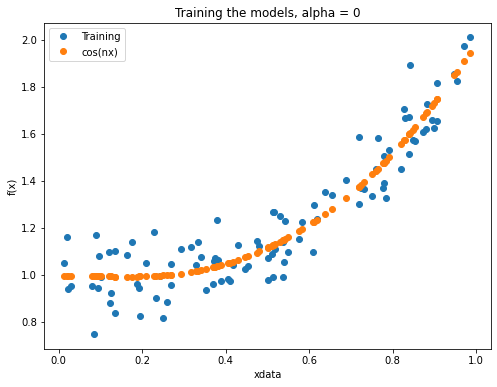

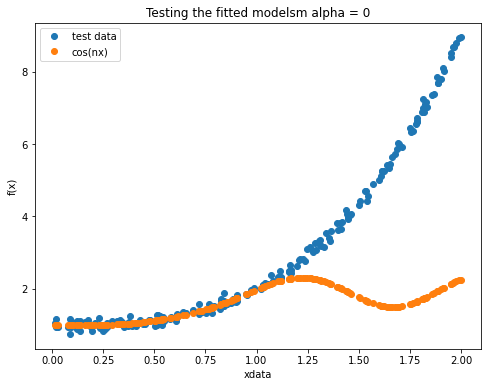

coefficents of x^n:  [ 0.         -0.14081351  0.62474661  0.41523865  0.21566794  0.06746684
 -0.02250433 -0.06236023 -0.0637676  -0.03772954]
coefficents of exp(nx):  [ 0.00000000e+00  2.06288241e-06  6.64611326e-06  3.58108718e-05
  7.34800302e-05  1.41860174e-04  2.53515660e-04  3.96471739e-04
  4.39700759e-04 -1.82400174e-04]
coefficents of cos(nx):  [ 0.         -0.17481515 -0.48177499 -0.20399953  0.15406617  0.18208326
 -0.05870372 -0.13794973  0.09947518 -0.00860793]


In [245]:
from sklearn.linear_model import Ridge, Lasso,ElasticNet 
import numpy as np
import matplotlib.pyplot as plt

# The Training data
N_train = 100
sigma_train = 0.1

# Create an array of n from 0 to 10, exclude 3.
n = [0,1,2,4,5,6,7,8,9,10]
# Draw Gaussian random noise
eps = sigma_train*np.random.randn(N_train)

# Generate training and testing data randomly from 0 to 1 and 1 to 2
x_train= np.random.uniform(0,1,N_train)
x_test = np.random.uniform(1,2,N_train)

# Third order
y_train = 1+x_train**3+eps
y_test = 1+x_test**3+eps

# Combine the training and test dataset together and make them into a vector
x = np.hstack((x_train,x_test))
y = np.hstack((y_train, y_test))


fig = plt.figure(figsize=(8, 6))

# Create a matrix of X that calcuate x^n with n values we have above
# In order to use Ridge to fit the basis function with some coefficient
X = np.zeros([len(x_train),len(n)])
for i in range (len(n)):
    for j in range (len(x_train)):
        X[j,i] = x_train[j]**n[i]

# Use Ridge regularization with alpha = 0, which is a L2 cost function and also apply SGD method as solver
clf = Ridge(alpha=0,solver='saga')
clf.fit(X, y_train)

# plot the training model
plt.plot(x_train, y_train, "o", label='Training data')
plt.plot(x_train,clf.predict(X),'o',label = 'x^n')
a1 = clf.coef_ # store the coefficients

plt.title('Training the models, alpha = 0')
plt.xlabel('xdata')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Create another matrix X that contain testing data with the same basis function x^n
fig = plt.figure(figsize=(8, 6))
X = np.zeros([len(x),len(n)])
for i in range (len(n)):
    for j in range (len(x)):
        X[j,i] = x[j]**n[i]


# Use the Ridge to predicting the result and plot the result with real dataset
# plot the testing model
plt.plot(x, y, 'o', label='test data')
plt.plot(x,clf.predict(X), 'o', label='x^n')
plt.title('Testing the fitted modelsm alpha = 0')
plt.xlabel('xdata')
plt.ylabel('f(x)')
plt.legend()
plt.show()


fig = plt.figure(figsize=(8, 6))

# Create a matrix of X that calcuate exp(n*x) with n values we have above
# In order to use Ridge to fit the basis function with some coefficient
X1 = np.zeros([len(x_train),len(n)])
for i in range (len(n)):
    for j in range (len(x_train)):
        X1[j,i] = np.exp(x_train[j]*n[i])


# Use Ridge regularization with alpha = 0, which is a L2 cost function and also apply SGD method as solver        
clf = Ridge(alpha=0,solver='saga')
clf.fit(X1, y_train)
a2 = clf.coef_ # store the coefficient

# plot the training model
plt.plot(x_train, y_train, "o", label='Training')
plt.plot(x_train,clf.predict(X1),'o',label = 'exp(nx)') 
plt.title('Training the models, alpha = 0')
plt.xlabel('xdata')
plt.ylabel('f(x)')
plt.legend()
plt.show()

fig = plt.figure(figsize=(8, 6))

# Create another matrix X that contain testing data with the same basis function x^n
X1 = np.zeros([len(x),len(n)])
for i in range (len(n)):
    for j in range (len(x)):
        X1[j,i] = np.exp(x[j]*n[i]) 

# plot the testing fitted model
plt.plot(x, y, 'o', label='test data')
p2=plt.plot(x,clf.predict(X1), 'o', label='exp(nx)')
plt.title('Testing the fitted modelsm alpha = 0')
plt.xlabel('xdata')
plt.ylabel('f(x)')
plt.legend()
plt.show()

 
fig = plt.figure(figsize=(8, 6))
# Create a matrix of X that calcuate cos(n*x) with n values we have above
# In order to use Ridge to fit the basis function with some coefficient
X2 = np.zeros([len(x_train),len(n)])
for i in range (len(n)):
    for j in range (len(x_train)):
        X2[j,i] = np.cos(x_train[j]*n[i])
        
# Use Ridge regularization with alpha = 0, which is a L2 cost function and also apply SGD method as solver
clf = Ridge(alpha=0,solver='saga')
clf.fit(X2, y_train)
a3 = clf.coef_ #store coefficient of basis function

# plot the training model
p1=plt.plot(x_train, y_train, "o", label='Training')
plt.plot(x_train,clf.predict(X2),'o',label = 'cos(nx)')
plt.xlabel('xdata')
plt.ylabel('f(x)')
plt.title('Training the models, alpha = 0')
plt.legend()
plt.show()
        
X2 = np.zeros([len(x),len(n)])
for i in range (len(n)):
    for j in range (len(x)):
        X2[j,i] = np.cos(x[j]*n[i])
        
fig = plt.figure(figsize=(8, 6))        
# plot the testing model
plt.plot(x, y, 'o', label='test data')
p2=plt.plot(x,clf.predict(X2), 'o', label='cos(nx)')
plt.title('Testing the fitted modelsm alpha = 0')
plt.xlabel('xdata')
plt.ylabel('f(x)')
plt.legend()
plt.show()


# print out the coefficients of three basis functions
print('coefficents of x^n: ',a1)
print('coefficents of exp(nx): ',a2)
print('coefficents of cos(nx): ',a3)

In training model $x^n$ and $\cos(nx)$ fit the training data best. In testing data the fitted model $e^{nx}$ fit the best if we ignore the last few points of the dataset. However, none of them are really good enough. There are still every large error of predicting test dataset. 

I think there are several ways to improve the regression. If we don't necessary use L2 cost function, we could try Lasso and ElasticNet regression with some small alpha. If we have to use L2 cost function, then I have to keep using ridge regression with alpha = 0. Then, we have three parameters left to adjust.



# Part 1 b) In the following plots I have only plot the test dataset regime. 

# Basis function $x^n$ with small range of training and testing data. Also different solver and very small $\sigma ^2$

<Figure size 576x432 with 0 Axes>

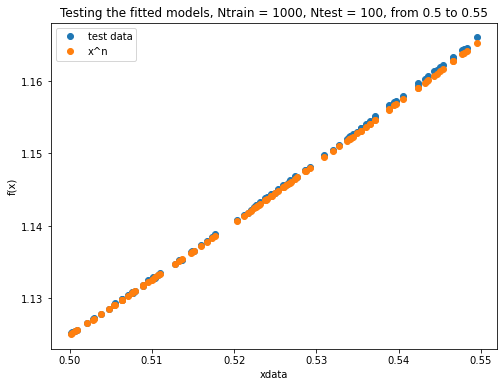

<Figure size 576x432 with 0 Axes>

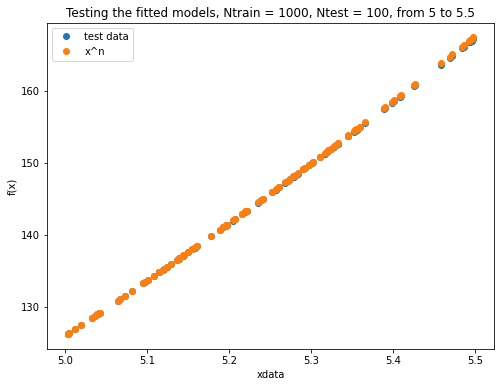

In [3]:
# The Training data
N_train = 1000
N_test = 100
sigma_train = 0.0001

# Create an array of n from 0 to 10, exclude 3.
n = [0,1,2,4,5,6,7,8,9,10]

# Generate training and testing data randomly from 0 to 1 and 1 to 2
x_train= np.random.uniform(0,0.5,N_train)
x_test = np.random.uniform(0.5,0.55,N_test)

# Third order
y_train = 1+x_train**3+sigma_train*np.random.randn(N_train)# Draw Gaussian random noise
y_test = 1+x_test**3+sigma_train*np.random.randn(N_test)# Draw Gaussian random noise


fig = plt.figure(figsize=(8, 6))

# Create a matrix of X that calcuate x^n with n values we have above
# In order to use Ridge to fit the basis function with some coefficient
X = np.zeros([len(x_train),len(n)])
for i in range (len(n)):
    for j in range (len(x_train)):
        X[j,i] = x_train[j]**n[i]

# Use Ridge regularization with alpha = 0, which is a L2 cost function and also apply SGD method as solver
clf = Ridge(alpha=0,solver='svd')#‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’
clf.fit(X, y_train)


# Create another matrix X that contain testing data with the same basis function x^n
fig = plt.figure(figsize=(8, 6))

X = np.zeros([len(x_test),len(n)])
for i in range (len(n)):
    for j in range (len(x_test)):
        X[j,i] = x_test[j]**n[i]


# Use the Ridge to predicting the result and plot the result with real dataset
# plot the testing model
plt.plot(x_test, y_test, 'o', label='test data')
plt.plot(x_test,clf.predict(X), 'o', label='x^n')
plt.title('Testing the fitted models, Ntrain = 1000, Ntest = 100, from 0.5 to 0.55')
plt.xlabel('xdata')
plt.ylabel('f(x)')
plt.legend()
plt.show()


# The Training data
N_train = 1000
N_test = 100
sigma_train = 0.0001

# Create an array of n from 0 to 10, exclude 3.
n = [0,1,2,4,5,6,7,8,9,10]

# Generate training and testing data randomly from 0 to 1 and 1 to 2
x_train= np.random.uniform(0,5,N_train)
x_test = np.random.uniform(5,5.5,N_test)

# Third order
y_train = 1+x_train**3+sigma_train*np.random.randn(N_train)# Draw Gaussian random noise
y_test = 1+x_test**3+sigma_train*np.random.randn(N_test)# Draw Gaussian random noise


fig = plt.figure(figsize=(8, 6))

# Create a matrix of X that calcuate x^n with n values we have above
# In order to use Ridge to fit the basis function with some coefficient
X = np.zeros([len(x_train),len(n)])
for i in range (len(n)):
    for j in range (len(x_train)):
        X[j,i] = x_train[j]**n[i]

# Use Ridge regularization with alpha = 0, which is a L2 cost function and also apply SGD method as solver
clf = Ridge(alpha=0,solver='svd')#‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’
clf.fit(X, y_train)


# Create another matrix X that contain testing data with the same basis function x^n
fig = plt.figure(figsize=(8, 6))

X = np.zeros([len(x_test),len(n)])
for i in range (len(n)):
    for j in range (len(x_test)):
        X[j,i] = x_test[j]**n[i]


# Use the Ridge to predicting the result and plot the result with real dataset
# plot the testing model
plt.plot(x_test, y_test, 'o', label='test data')
plt.plot(x_test,clf.predict(X), 'o', label='x^n')
plt.title('Testing the fitted models, Ntrain = 1000, Ntest = 100, from 5 to 5.5')
plt.xlabel('xdata')
plt.ylabel('f(x)')
plt.legend()
plt.show()


# Basis function exp(nx) with small range of training and testing data. Also different solver and very small $\sigma ^2$

<Figure size 576x432 with 0 Axes>

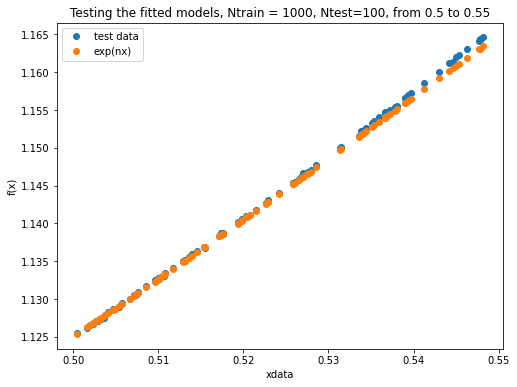

<Figure size 576x432 with 0 Axes>

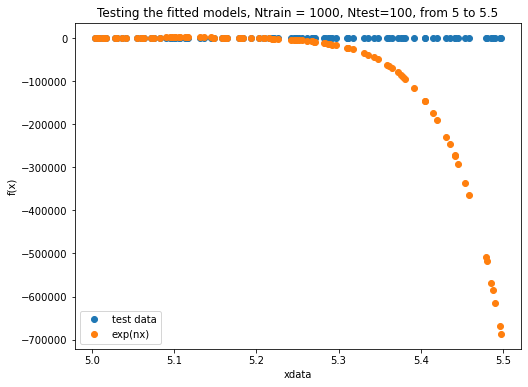

In [4]:
# The Training data
N_train = 1000
N_test = 100
sigma_train = 0.0001

# Create an array of n from 0 to 10, exclude 3.
n = [0,1,2,4,5,6,7,8,9,10]

# Generate training and testing data randomly from 0 to 1 and 1 to 2
x_train= np.random.uniform(0,0.5,N_train)
x_test = np.random.uniform(0.5,0.55,N_test)

# Third order
y_train = 1+x_train**3+sigma_train*np.random.randn(N_train)# Draw Gaussian random noise
y_test = 1+x_test**3+sigma_train*np.random.randn(N_test)# Draw Gaussian random noise

fig = plt.figure(figsize=(8, 6))

# Create a matrix of X that calcuate exp(n*x) with n values we have above
# In order to use Ridge to fit the basis function with some coefficient
X1 = np.zeros([len(x_train),len(n)])
for i in range (len(n)):
    for j in range (len(x_train)):
        X1[j,i] = np.exp(x_train[j]*n[i])


# Use Ridge regularization with alpha = 0, which is a L2 cost function and also apply SGD method as solver        
clf = Ridge(alpha=0,solver='svd') #‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’
clf.fit(X1, y_train)
a2 = clf.coef_ # store the coefficient


fig = plt.figure(figsize=(8, 6))

# Create another matrix X that contain testing data with the same basis function x^n
X1 = np.zeros([len(x_test),len(n)])
for i in range (len(n)):
    for j in range (len(x_test)):
        X1[j,i] = np.exp(x_test[j]*n[i]) 

# plot the testing fitted model
plt.plot(x_test, y_test, 'o', label='test data')
p2=plt.plot(x_test,clf.predict(X1), 'o', label='exp(nx)')
plt.title('Testing the fitted models, Ntrain = 1000, Ntest=100, from 0.5 to 0.55')
plt.xlabel('xdata')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# The Training data
N_train = 1000
N_test = 100
sigma_train = 0.0001

# Create an array of n from 0 to 10, exclude 3.
n = [0,1,2,4,5,6,7,8,9,10]

# Generate training and testing data randomly from 0 to 1 and 1 to 2
x_train= np.random.uniform(0,5,N_train)
x_test = np.random.uniform(5,5.5,N_test)

# Third order
y_train = 1+x_train**3+sigma_train*np.random.randn(N_train)# Draw Gaussian random noise
y_test = 1+x_test**3+sigma_train*np.random.randn(N_test)# Draw Gaussian random noise

fig = plt.figure(figsize=(8, 6))

# Create a matrix of X that calcuate exp(n*x) with n values we have above
# In order to use Ridge to fit the basis function with some coefficient
X1 = np.zeros([len(x_train),len(n)])
for i in range (len(n)):
    for j in range (len(x_train)):
        X1[j,i] = np.exp(x_train[j]*n[i])


# Use Ridge regularization with alpha = 0, which is a L2 cost function and also apply SGD method as solver        
clf = Ridge(alpha=0,solver='svd') #‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’
clf.fit(X1, y_train)
a2 = clf.coef_ # store the coefficient


fig = plt.figure(figsize=(8, 6))

# Create another matrix X that contain testing data with the same basis function x^n
X1 = np.zeros([len(x_test),len(n)])
for i in range (len(n)):
    for j in range (len(x_test)):
        X1[j,i] = np.exp(x_test[j]*n[i]) 

# plot the testing fitted model
plt.plot(x_test, y_test, 'o', label='test data')
p2=plt.plot(x_test,clf.predict(X1), 'o', label='exp(nx)')
plt.title('Testing the fitted models, Ntrain = 1000, Ntest=100, from 5 to 5.5')
plt.xlabel('xdata')
plt.ylabel('f(x)')
plt.legend()
plt.show()


# Basis function cos(nx) with small range of training and testing data. Also different solver and very small $\sigma ^2$

<Figure size 576x432 with 0 Axes>

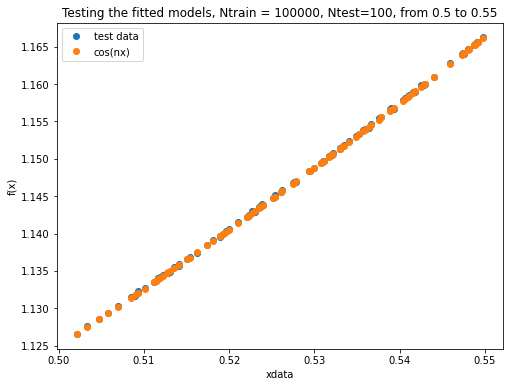

<Figure size 576x432 with 0 Axes>

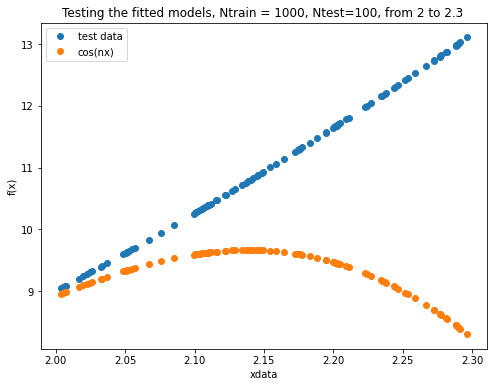

In [5]:
# The Training data
N_train = 100000
N_test = 100
sigma_train = 0.0001

# Create an array of n from 0 to 10, exclude 3.
n = [0,1,2,4,5,6,7,8,9,10]

# Generate training and testing data randomly from 0 to 1 and 1 to 2
x_train= np.random.uniform(0,0.5,N_train)
x_test = np.random.uniform(0.5,0.55,N_test)

# Third order
y_train = 1+x_train**3+sigma_train*np.random.randn(N_train)# Draw Gaussian random noise
y_test = 1+x_test**3+sigma_train*np.random.randn(N_test)# Draw Gaussian random noise
 
fig = plt.figure(figsize=(8, 6))
# Create a matrix of X that calcuate cos(n*x) with n values we have above
# In order to use Ridge to fit the basis function with some coefficient
X2 = np.zeros([len(x_train),len(n)])
for i in range (len(n)):
    for j in range (len(x_train)):
        X2[j,i] = np.cos(x_train[j]*n[i])
        
# Use Ridge regularization with alpha = 0, which is a L2 cost function and also apply SGD method as solver
clf = Ridge(alpha=0,solver='saga') #‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’
clf.fit(X2, y_train)
a3 = clf.coef_ #store coefficient of basis function


X2 = np.zeros([len(x_test),len(n)])
for i in range (len(n)):
    for j in range (len(x_test)):
        X2[j,i] = np.cos(x_test[j]*n[i])
        
fig = plt.figure(figsize=(8, 6))        
# plot the testing model
plt.plot(x_test, y_test, 'o', label='test data')
p2=plt.plot(x_test,clf.predict(X2), 'o', label='cos(nx)')
plt.title('Testing the fitted models, Ntrain = 100000, Ntest=100, from 0.5 to 0.55')
plt.xlabel('xdata')
plt.ylabel('f(x)')
plt.legend()
plt.show()


# The Training data
N_train = 1000
N_test = 100
sigma_train = 0.0001

# Create an array of n from 0 to 10, exclude 3.
n = [0,1,2,4,5,6,7,8,9,10]

# Generate training and testing data randomly from 0 to 1 and 1 to 2
x_train= np.random.uniform(0,2,N_train)
x_test = np.random.uniform(2,2.3,N_test)

# Third order
y_train = 1+x_train**3+sigma_train*np.random.randn(N_train)# Draw Gaussian random noise
y_test = 1+x_test**3+sigma_train*np.random.randn(N_test)# Draw Gaussian random noise
 
fig = plt.figure(figsize=(8, 6))
# Create a matrix of X that calcuate cos(n*x) with n values we have above
# In order to use Ridge to fit the basis function with some coefficient
X2 = np.zeros([len(x_train),len(n)])
for i in range (len(n)):
    for j in range (len(x_train)):
        X2[j,i] = np.cos(x_train[j]*n[i])
        
# Use Ridge regularization with alpha = 0, which is a L2 cost function and also apply SGD method as solver
clf = Ridge(alpha=0,solver='saga') #‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’
clf.fit(X2, y_train)
a3 = clf.coef_ #store coefficient of basis function


X2 = np.zeros([len(x_test),len(n)])
for i in range (len(n)):
    for j in range (len(x_test)):
        X2[j,i] = np.cos(x_test[j]*n[i])
        
fig = plt.figure(figsize=(8, 6))        
# plot the testing model
plt.plot(x_test, y_test, 'o', label='test data')
p2=plt.plot(x_test,clf.predict(X2), 'o', label='cos(nx)')
plt.title('Testing the fitted models, Ntrain = 1000, Ntest=100, from 2 to 2.3 ')
plt.xlabel('xdata')
plt.ylabel('f(x)')
plt.legend()
plt.show()


# Part 1 c)

I have apply Lasso and ElasticNet regression, but still Ridge regression works the best. I assume for part b) we could play around with the initial conditions, so I have decrease $\sigma^2$ to some very small number, in order to decrease the nosie of the data. I have also play around with all of the solver for each different cases ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’. In the meantime, I change N and x. 

We all know increasing the number of training data would help us to predict the test dataset. However, I find the ratio or the length of dataset matters as well. If we have longer length of training dataset, which will give us a better result. So I have created two cases:

Number of training data = 1000 and number of testing data = 100
1) The length of training data from 0 to 0.5. The length of test data from 0.5 to 0.55<br>
2) The length of training data from 0 to 5. The length of test data from 5 to 5.5


The best cost function is still L2 cost function (Ridge). The best basis function is $x^n$, which predict the test data the best. The reason is giving in following.<br>

I took three basis functions and plot them with above two cases using the best solver for the model, where based on the plots from part b), I conclude: <br>
For $x^n$: I found solver 'svd', 'lsqr', and 'cholesky' work the best. It could predict small and larage values of test dataset. <br> 
For $e^{nx}$: I found solver 'saga', 'sag' and 'lsqr' work the best. However it could only predict small value of test dataset, which makes sense, since it increase exponentially. <br>
For $\cos(nx)$: I found solver 'saga' works the best. However it could only predict small value of test dataset, which makes sense also, the largest value of cos is 1. So, it could not predict large values of test data.

Therefore, L2 cost function with basis function $x^n$ works the best. The quality of the fit is very good for all three different basis function in small value of dataset. Only the $x^n$ predicts large number of dataset.

# Problem 2: Ensembles

# Part 2 a)

In [ ]:
# The Training data
N_train = 100000
N_test = 100
sigma_train = 0.0001

# Create an array of n from 0 to 10, exclude 3.
n = [0,1,2,4,5,6,7,8,9,10]

# Generate training and testing data randomly from 0 to 1 and 1 to 2
x_train= np.random.uniform(0,0.5,N_train)
x_test = np.random.uniform(0.5,0.55,N_test)

# Third order
y_train = 1+x_train**3+sigma_train*np.random.randn(N_train)# Draw Gaussian random noise
y_test = 1+x_test**3+sigma_train*np.random.randn(N_test)# Draw Gaussian random noise


In [254]:
import numpy as np
import random
import os, subprocess
from random import randrange
import matplotlib.pyplot as plt
from operator import add
print(__doc__)
#import seaborn as sns
 
class Perceptron:
    def __init__(self, N, boostrap_data, inputX = None, inputS = None):
        # Random linearly separated data
        xA = np.random.uniform(0, 1)
        xB = np.random.uniform(1,1.2)
        yA = 1+xA**3+0.0001*np.random.randn()
        yB = 1+xB**3+0.0001*np.random.randn()
        self.V = np.array([xB*yA-xA*yB, yB-yA, xA-xB])

        if boostrap_data is None:
            self.X = self.generate_points(N, inputX)
        else:
            self.X = bootstrap_data
 
    def generate_points(self, N, inputX = None, inputS = None):
        X = []
        if (inputX is None) and (inputS is None):
            for i in range(N):
                x1 = np.random.uniform(0, 1)
                x2 = np.random.uniform(1, 1.2)
                #x1 = random.uniform(-1,1)
                #x1 = np.random.randn()
                #x2 = np.sqrt(1-x1**2)+0.5*np.random.randn()
                x = np.array([1,x1,x2])
                s = int(np.sign(self.V.T.dot(x)))
                X.append((x, s))
        else:
            for i in range(N):
                x = inputX[i][0]
                s = int(inputS[i])
                X.append((x,s))
        return X
 
    def plot(self, mispts=None, vec=None, save=False):
        fig = plt.figure(figsize=(5,5))

        V = self.V
        a, b = -V[1]/V[2], -V[0]/V[2]
        l = np.linspace(-1,1)
        plt.plot(l, a*l+b, 'k-')
        cols = {1: 'r', -1: 'b'}
        for x,s in self.X:
            plt.plot(x[1], x[2], cols[s]+'o')
        if mispts:
            for x,s in mispts:
                plt.plot(x[1], x[2], cols[s]+'.')
        if vec != None:
            aa, bb = -vec[1]/vec[2], -vec[0]/vec[2]
            plt.plot(l, aa*l+bb, 'g-', lw=2)
        if save:
            if not mispts:
                plt.title('N = %s' % (str(len(self.X))))
            else:
                plt.title('N = %s with %s test points' \
                          % (str(len(self.X)),str(len(mispts))))
            plt.savefig('p_N%s' % (str(len(self.X))), \
                        dpi=200, bbox_inches='tight')
 
    def classification_error(self, vec, pts=None):
        # Error defined as fraction of misclassified points
        if not pts:
            pts = self.X
        M = len(pts)
        n_mispts = 0
        for x,s in pts:
            if int(np.sign(vec.T.dot(x))) != s:
                n_mispts += 1
        error = n_mispts / float(M)
        return error
 
    def choose_miscl_point(self, vec):
        # Choose a random point among the misclassified
        pts = self.X
        mispts = []
        for x,s in pts:
            if int(np.sign(vec.T.dot(x))) != s:
                mispts.append((x, s))
        return mispts[random.randrange(0,len(mispts))]
     
    def pla(self, save=False):
        """Perceptron learning algorithm"""
        # Initialize the weigths to zeros
        w = np.zeros(3)
        X, N = self.X, len(self.X)
        it = 0
        # Iterate until all points are correctly classified
        while self.classification_error(w) != 0:
            it += 1
            # Pick random misclassified point
            x, s = self.choose_miscl_point(w)
            # Update weights
            w += s*x
            if save:
                self.plot(vec=w)
                plt.title('N = %s, Iteration %s\n' \
                          % (str(N),str(it)))
                plt.savefig('p_N%s_it%s' % (str(N),str(it)), \
                            dpi=200, bbox_inches='tight')
        self.w = w
 
    def check_error(self, M, vec):
        check_pts = self.generate_points(M)
        return self.classification_error(vec, pts=check_pts)



In [220]:
def subsample(dataset, ratio=1.0):
    sample = list()
    n_sample = round(len(dataset) * ratio)
    while len(sample) < n_sample:
        index = randrange(len(dataset))
        sample.append(dataset[index])
    return sample

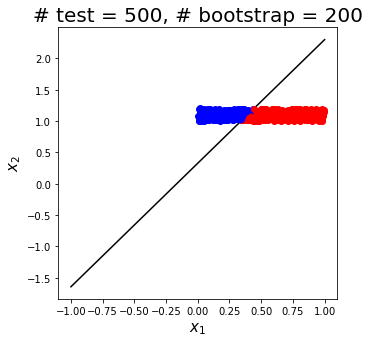

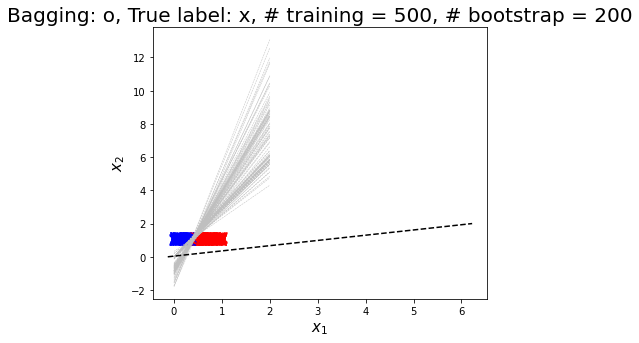

average error:  0.021439999999999997
Max error:  0.066


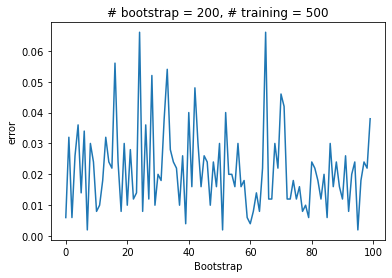

In [226]:
n_training_samples = 500
n_bootstrap_samples = 100 # i.e. B
bootstrap_ratio = 0.1      # i.e. M = n_training_samples*bootstrap_ratio
w_blended = np.zeros([1,3])


p = Perceptron(n_training_samples, boostrap_data = None)
error = []
for i in range(n_bootstrap_samples):
    bootstrap_data = subsample(p.X, bootstrap_ratio)
    pb = Perceptron(int(round(n_training_samples*bootstrap_ratio)), bootstrap_data)
    pb.pla()
    
    w_blended = np.concatenate((w_blended, [pb.w]), axis=0)


w_blended = np.delete(w_blended, 0, 0)
w_bag = np.sum(w_blended, axis = 0)/float(n_bootstrap_samples) 


pts = p.X
sall = [0]*n_training_samples

for i in range(n_bootstrap_samples):
    vec = w_blended[i]
    stmp = list()
    error.append(p.check_error(len(pts),vec))
    for x,s in pts:
        stmp.append(int(np.sign(vec.T.dot(x))))
    sall = map(add, sall, stmp)

s_bag = np.sign(np.array(list(sall))/(float(n_bootstrap_samples)))
Xbag = p.generate_points(n_training_samples, pts, s_bag)
p.plot()
plt.xlabel('$x_1$', multialignment='left', fontweight='bold', fontsize=15)
plt.ylabel('$x_2$', multialignment='left', fontweight='bold', fontsize=15)
plt.title('# test = 500, # bootstrap = 200', multialignment='left', fontsize=20)
plt.show()


fig, ax = plt.subplots(1, 1,figsize=(6,5))
cols = {1: 'r', -1: 'b'}
l = np.linspace(0,2)

for i in range(n_training_samples):
    plt.plot(Xbag[i][0][1], Xbag[i][0][2], cols[Xbag[i][1]]+'o')
    plt.plot(Xbag[i][0][1], Xbag[i][0][2], cols[pts[i][1]]+'x', markersize=10)

for i in range(n_bootstrap_samples):
    aa, bb = -w_blended[i][1]/w_blended[i][2], -w_blended[i][0]/w_blended[i][2]
    plt.plot(l, aa*l+bb,'--', color = '0.75', lw= 0.5)

cc, dd = -w_bag[1]/w_bag[2], -w_bag[0]/w_bag[2]
plt.plot(cc*l+dd,l ,'k--', lw= 1.5)
plt.xlabel('$x_1$', multialignment='left', fontweight='bold', fontsize=15)
plt.ylabel('$x_2$', multialignment='left', fontweight='bold', fontsize=15)

plt.title('Bagging: o, True label: x, # training = 500, # bootstrap = 200', multialignment='left', fontsize=20)
plt.show()


plt.plot(error)
plt.xlabel('Bootstrap')
plt.ylabel('error')
plt.title('# bootstrap = 200, # training = 500')

print('average error: ',np.mean(error))
print('Max error: ', np.max(error))

I use bagging technique to predict the data, with very small noise and smaller range of test data. I took 500 training data points (training data from 0 to 1, testing data from 1 to 1.2). The max error that I obtain is 6.6% and the average error is 2.144%, which the result is indeed improve a little bit compare with what I obtain from previous question. However, I don't think that I am solving the question correctly, since I did not apply the basis function, instead I only keep $1+x^3+\text{noise}$ as my model. 

# Part 2 b)



 
start = time.time()
gb.fit(X_train[:,np.newaxis], y_train)
time_gb.append(time.time() - start)

start = time.time()
gbes.fit(X_train[:,np.newaxis], y_train)
time_gbes.append(time.time() - start)


score_gb.append(gb.score(X_test[:,np.newaxis], y_test))
score_gbes.append(gbes.score(X_test[:,np.newaxis], y_test))
n_gb.append(gb.n_estimators_)
n_gbes.append(gbes.n_estimators_)




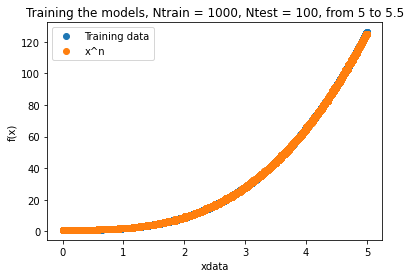

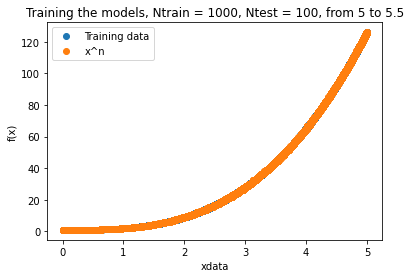

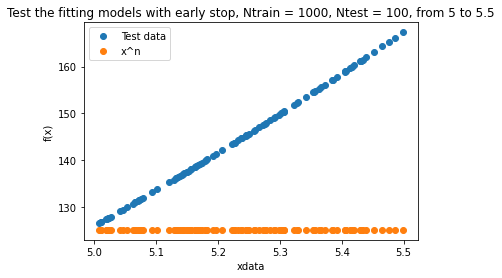

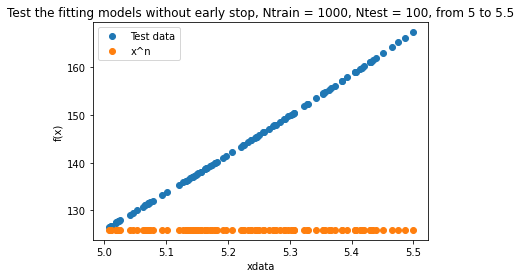

without early stop score:  -2.790070584279847
with early stop score:  -3.024896961948568


In [256]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.model_selection import train_test_split

print(__doc__)

# The Training data
N_train = 10000
N_test = 100
sigma_train = 0.0001

# Create an array of n from 0 to 10, exclude 3.
n = [0,1,2,4,5,6,7,8,9,10]

# Generate training and testing data randomly from 0 to 1 and 1 to 2
X_train= np.random.uniform(0,5,N_train)
X_test = np.random.uniform(5,5.5,N_test)

# Third order
y_train = 1+X_train**3+sigma_train*np.random.randn(N_train)# Draw Gaussian random noise
y_test = 1+X_test**3+sigma_train*np.random.randn(N_test)# Draw Gaussian random noise
 


n_estimators = N

n = [0,1,2,4,5,6,7,8,9,10]
                                               
X = np.zeros([len(X_train),len(n)])
for i in range (len(n)):
    for j in range (len(X_train)):
        X[j,i] = X_train[j]**n[i] 
        
             
X1 = np.zeros([len(X_test),len(n)])
for i in range (len(n)):
    for j in range (len(X_test)):
        X1[j,i] = X_test[j]**n[i]

# We specify that if the scores don't improve by atleast 0.01 for the last
# 10 stages, stop fitting additional stages
gbes = ensemble.GradientBoostingRegressor(n_estimators=n_estimators,
                                           validation_fraction=0.2,
                                           n_iter_no_change=5, tol=0.01,
                                           random_state=0)
gb = ensemble.GradientBoostingRegressor(n_estimators=n_estimators,
                                         random_state=0)


gbes.fit(X, y_train)
gb.fit(X, y_train)


# Use the Graident Boost to predicting the result and plot the result with real dataset
# plot the testing model
plt.plot(X_train, y_train, 'o', label='Training data')
plt.plot(X_train,gbes.predict(X), 'o', label='x^n')
plt.title('Training the models, Ntrain = 1000, Ntest = 100, from 5 to 5.5')
plt.xlabel('xdata')
plt.ylabel('f(x)')
plt.legend()
plt.show()

plt.plot(X_train, y_train, 'o', label='Training data')
plt.plot(X_train,gb.predict(X), 'o', label='x^n')
plt.title('Training the models, Ntrain = 1000, Ntest = 100, from 5 to 5.5')
plt.xlabel('xdata')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Use the Gradient Boost to predicting the result and plot the result with real dataset
# plot the testing model
plt.plot(X_test, y_test, 'o', label='Test data')
plt.plot(X_test,gbes.predict(X1), 'o', label='x^n')
plt.title('Test the fitting models with early stop, Ntrain = 1000, Ntest = 100, from 5 to 5.5')
plt.xlabel('xdata')
plt.ylabel('f(x)')
plt.legend()
plt.show()

plt.plot(X_test, y_test, 'o', label='Test data')
plt.plot(X_test,gb.predict(X1), 'o', label='x^n')
plt.title('Test the fitting models without early stop, Ntrain = 1000, Ntest = 100, from 5 to 5.5')
plt.xlabel('xdata')
plt.ylabel('f(x)')
plt.legend()
plt.show()


print('without early stop score: ',gb.score(X1,y_test))
print('with early stop score: ', gbes.score(X1,y_test))

I have applied basis function $x^n$ and use early stopping of gradient boosting to solve the problem. The score that I find is negative which is weird. If I remove the basis function, then the fitting return 99.83% and 99.87%, which is good. I am confused on how to get hyperparameters. From the plots that I obtain above this method is worser than ensembles and L2 regularization.

In [ ]:
ADR: 9/10. Tuning down the noise makes things work, but erases much of the challenge (extrapolation is hard).